## Face Detection using Eigen Faces (PCA Algorithm)

Setting up the Notebook

In [ ]:
!pip install detecto

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import cv2 as cv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

from PIL import Image

from detecto import core, utils, visualize
from numpy import asarray
import itertools

import os
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

os.chdir('/content/drive/My Drive/DH')

Mounted at /content/drive


In [ ]:
ls

 ALZHEIMERS/                        face_detection.ipynb
 dataset/                           images/
 FaceDetection_eigen_1050pm.ipynb   ML_Proj.ipynb
'FaceDetection_eigen (1).ipynb'     model_weights.pth
 FaceDetection_eigen.ipynb


Dataset Preparation

In [ ]:
im_width = 160
im_height = 160

In [ ]:
def create_dataset(img_folder):
   
    img_data_array=[]
    class_name=[]
   
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
       
            image_path = os.path.join(img_folder, dir1,  file)
            image = cv.imread(image_path, cv.COLOR_BGR2RGB)
            image = cv.resize(image, (im_height, im_width),interpolation = cv.INTER_AREA)
            image = cv.bitwise_not(image)
            image = np.array(image)
            image = (image * 255).astype(np.uint8)
            img_data_array.append(image)
            class_name.append(dir1)
            
    return img_data_array, class_name

img_array, class_names = create_dataset('dataset')

In [ ]:
print(len(img_array), len(class_names))

180 180


Visualizing the Dataset

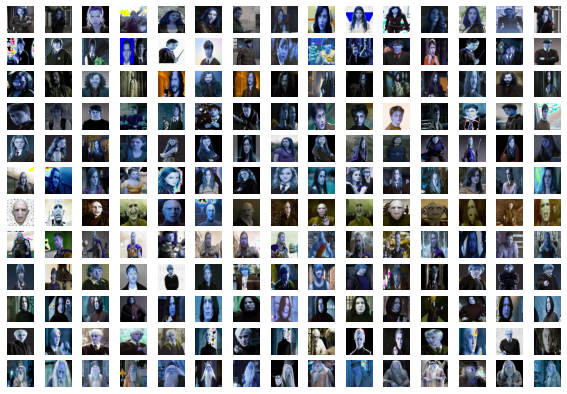

In [ ]:
rows = 12
columns = 15
fig = plt.figure(figsize=(10, 7))

for index, img in enumerate(img_array):
    fig.add_subplot(rows, columns, index+1)
    plt.axis('off')
    plt.imshow(img)

Cropping the faces from the images

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


  0%|          | 0.00/160M [00:00<?, ?B/s]

177
177


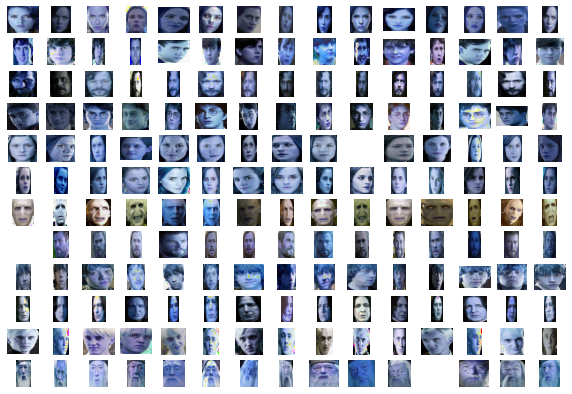

In [ ]:
model = core.Model.load('model_weights.pth', ['face'])

fig = plt.figure(figsize = (10, 7))
  
rows = 12
columns = 15
face_array = []
empty_images_indices = []

for index, face in enumerate(img_array):
    predictions = model.predict(face)
    labels, boxes, scores = predictions

    if len(boxes) != 0:
        face1 = boxes[0,:]
        face1 = face1.numpy()
        face = face[int(face1[1]):int(face1[3]), int(face1[0]):int(face1[2])]
        face_array.append(face)
        fig.add_subplot(rows, columns, index+1)
        plt.axis('off')
        plt.imshow(face)
    else:
         empty_images_indices.append(index)

for i in sorted(empty_images_indices, reverse=True):
    del class_names[i]

print(len(class_names))
print(len(face_array))

PCA - Principle Component Analysis

In [ ]:
def list_convert(img):
  
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    gray = cv.resize(gray,(80,120),interpolation = cv.INTER_AREA)
    gray_df = pd.DataFrame(data = gray)
    gray_list = gray_df.values.tolist()    
    gray_list_1D = list(itertools.chain.from_iterable(gray_list))
  
    return(gray_list_1D)

[1.29051536e+08 4.38579228e+06 4.20960294e+06 2.43070307e+06
 1.18736594e+06 8.34423627e+05 7.39735077e+05 6.75545739e+05
 5.64286279e+05 4.87431187e+05 4.57216743e+05 4.05136671e+05
 3.80027029e+05 3.51379035e+05 3.11409674e+05 2.90585826e+05
 2.56246091e+05 2.41967099e+05 2.05491488e+05 2.02016857e+05
 1.95288795e+05 1.84498653e+05 1.69709121e+05 1.64965973e+05
 1.59181920e+05 1.45272855e+05 1.40733054e+05 1.33813776e+05
 1.27891460e+05 1.24329453e+05 1.21503626e+05 1.14926903e+05
 1.07520520e+05 1.04071169e+05 9.82203286e+04 9.41699885e+04
 9.34285153e+04 9.16508401e+04 8.95339864e+04 8.54602416e+04
 7.90356208e+04 7.85481394e+04 7.58556568e+04 7.10574391e+04
 6.81965888e+04 6.65883829e+04 6.32693727e+04 6.34264305e+04
 6.07888872e+04 6.14922075e+04 5.85066712e+04 5.67534934e+04
 5.10394585e+04 5.33417540e+04 5.49236375e+04 5.48440326e+04
 4.95252406e+04 4.77919052e+04 4.68637618e+04 4.64186312e+04
 4.52639106e+04 4.42339812e+04 4.28056984e+04 4.22534579e+04
 4.04566912e+04 3.952341

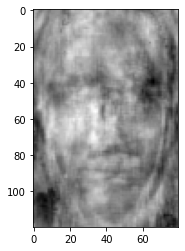

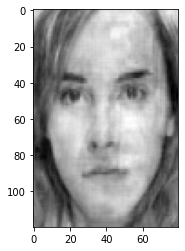

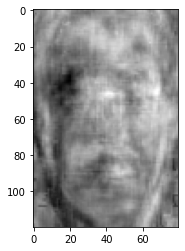

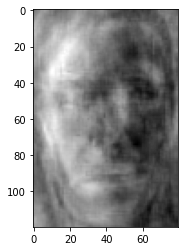

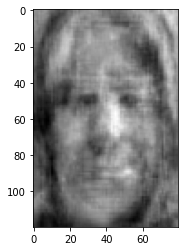

Shape of Eigen Vector:  (5, 9600)


In [ ]:
list_images_1D = []

for face in face_array:
   list_images_1D.append(list_convert(face))

list_images_1D = np.asarray(list_images_1D)
avg = np.mean(list_images_1D,axis = 0)

cov_mat = np.matmul(list_images_1D,list_images_1D.T)/177

w , v = np.linalg.eig(cov_mat)
print(w)
print(v)

eigen_vec = []
for i in range(5):
    eig_temp = np.matmul(v[i],list_images_1D)
    if len(eigen_vec) == 0:
      eigen_vec = eig_temp
    else:
      eigen_vec = np.vstack((eigen_vec,eig_temp))
    eigen_face = np.reshape(eig_temp,(120,80))
    plt.imshow(eigen_face,cmap = 'gray')
    plt.show()

print("Shape of Eigen Vector: ", eigen_vec.shape)


Dataframe of weights and labels

In [ ]:
weight_vec_array = []
for img_1D in list_images_1D:
   std_face = np.asarray(img_1D) - np.asarray(avg)
   weight_vec_array.append(np.matmul(eigen_vec,std_face))
weight_vec_array = np.asarray(weight_vec_array)

df_dataset = pd.DataFrame(weight_vec_array,columns = ['w1','w2','w3','w4','w5'])

df_dataset['Label'] = class_names

print(df_dataset)

               w1            w2            w3            w4            w5  \
0    1.201372e+07  4.088297e+06 -7.934309e+06  3.305407e+07  2.523762e+06   
1    2.842283e+06 -5.873095e+07 -3.798432e+07 -2.624902e+07 -5.985001e+07   
2   -2.265907e+06  3.581680e+07  2.498598e+07  2.457728e+07  3.727135e+07   
3   -4.229492e+06 -1.062019e+07 -3.838820e+06  1.592241e+06 -3.549609e+06   
4    3.242093e+06 -3.985542e+07 -3.037811e+07 -7.261221e+06 -4.110285e+07   
..            ...           ...           ...           ...           ...   
172 -5.093243e+06 -8.566256e+06 -1.590396e+06 -4.897470e+06 -4.668098e+06   
173 -1.468696e+06  1.835450e+07  1.481507e+07  1.340280e+07  2.438023e+07   
174 -9.032990e+04  1.323267e+06 -2.392218e+06  1.551071e+07  3.171846e+06   
175 -7.159067e+06  1.577518e+07  1.281660e+07  8.772157e+06  2.104748e+07   
176 -5.013973e+06  2.788356e+07  1.877450e+07  7.664817e+06  2.965710e+07   

            Label  
0    natasha_roma  
1    natasha_roma  
2    natasha_ro

1-NN Classification

In [ ]:
x = df_dataset.iloc[:,0:5]
y = df_dataset.iloc[:,5]

x_train, x_test, y_train, y_test = train_test_split( x ,y , random_state=167, test_size = 0.10)

df_test = pd.concat( [pd.DataFrame(x_test),pd.DataFrame(y_test)], axis=1)
df_test.index = [i for i in range(len(x_test))]

knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(x_train, y_train)

# Predict on dataset which model has not seen before
pred = knn.predict(x_test)
print('WITH K = 1')
df_test['Predicted'] = pd.DataFrame(pred)

print(df_test[['Predicted','Label']])

# Calculate the accuracy of the model
print("accuracy: ", knn.score(x_test, y_test))


WITH K = 1
         Predicted           Label
0             thor       albus_dum
1       voldermort       albus_dum
2   hermoine_grang  severous_snape
3    ginny_weasley   ginny_weasley
4     natasha_roma     ron_weasley
5     neville_long    neville_long
6   severous_snape  severous_snape
7   severous_snape    natasha_roma
8     harry_potter    serius_black
9     draco_malfoy    draco_malfoy
10  hermoine_grang  hermoine_grang
11    natasha_roma    serius_black
12       albus_dum       albus_dum
13  hermoine_grang    serius_black
14     ron_weasley     ron_weasley
15    natasha_roma            thor
16            thor            thor
17     ron_weasley            thor
accuracy:  0.4444444444444444


Training Model

In [ ]:
from detecto import core, utils, visualize

dataset = core.Dataset('images/')
model = core.Model(['face'])

model.fit(dataset)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


  0%|          | 0.00/160M [00:00<?, ?B/s]

Epoch 1 of 10
Begin iterating over training dataset


100%|██████████| 185/185 [00:58<00:00,  3.17it/s]


Epoch 2 of 10
Begin iterating over training dataset


100%|██████████| 185/185 [00:50<00:00,  3.67it/s]


Epoch 3 of 10
Begin iterating over training dataset


100%|██████████| 185/185 [00:50<00:00,  3.65it/s]


Epoch 4 of 10
Begin iterating over training dataset


100%|██████████| 185/185 [00:50<00:00,  3.66it/s]


Epoch 5 of 10
Begin iterating over training dataset


100%|██████████| 185/185 [00:50<00:00,  3.66it/s]


Epoch 6 of 10
Begin iterating over training dataset


100%|██████████| 185/185 [00:50<00:00,  3.66it/s]


Epoch 7 of 10
Begin iterating over training dataset


100%|██████████| 185/185 [00:50<00:00,  3.66it/s]


Epoch 8 of 10
Begin iterating over training dataset


100%|██████████| 185/185 [00:50<00:00,  3.66it/s]


Epoch 9 of 10
Begin iterating over training dataset


100%|██████████| 185/185 [00:50<00:00,  3.66it/s]


Epoch 10 of 10
Begin iterating over training dataset


100%|██████████| 185/185 [00:50<00:00,  3.67it/s]


In [ ]:
model.save('model_weights.pth')